<a href="https://colab.research.google.com/github/ruchikaa123/Fruit-Recognition/blob/main/FruitsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

--2021-08-14 20:16:58--  https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fxn3ldztzwxm0rw/FruitsData.zip [following]
--2021-08-14 20:16:59--  https://www.dropbox.com/s/raw/fxn3ldztzwxm0rw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ce565683fd37305bade3acf6f.dl.dropboxusercontent.com/cd/0/inline/BUOZUofC3pl7Wp0H8Z7ld3BeVSc_N7hspsGGY-paWtNSZ7Iq56b0BT9lnTumtK7qwvrp_ZEf09Hhyh1oNOeokuud3yEQaFiE9ZxMa-KwQTKitR_idxAU7wKPbw6-k52Nt7Dzgr8y_qc4gv2gxgp5ih2f/file# [following]
--2021-08-14 20:16:59--  https://uc3ce565683fd37305bade3acf6f.dl.dropboxusercontent.com/cd/0/inline/BUOZUofC3pl7Wp0H8Z7ld3BeVSc_N7hspsGGY-paWtNSZ7Iq56b0BT9lnTumtK7qwvrp_ZEf09Hhyh1oNOe

In [2]:
!unzip -q "/content/FruitsData.zip"

In [3]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [4]:
# Creating the Pathlib PATH objects
train_path = Path("fruits-360/Training")
test_path = Path("fruits-360/Test")

In [5]:
# Getting Image paths 
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['fruits-360/Training/Pitahaya Red/r_42_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_226_100.jpg',
 'fruits-360/Training/Pitahaya Red/285_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_72_100.jpg',
 'fruits-360/Training/Pitahaya Red/62_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_54_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_254_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_214_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_131_100.jpg',
 'fruits-360/Training/Pitahaya Red/r_263_100.jpg']

In [6]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red',
 'Pitahaya Red']

In [7]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([101, 101, 101, 101, 101, 101, 101, 101, 101, 101])

In [8]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

In [10]:
Train_paths[:10] , Train_labels[:10]

(['fruits-360/Training/Pepper Green/49_100.jpg',
  'fruits-360/Training/Tomato Yellow/r2_149_100.jpg',
  'fruits-360/Training/Apple Red 3/r_121_100.jpg',
  'fruits-360/Training/Grapefruit Pink/r_249_100.jpg',
  'fruits-360/Training/Cherry 2/r2_103_100.jpg',
  'fruits-360/Training/Pear Forelle/r_196_100.jpg',
  'fruits-360/Training/Cactus fruit/r_52_100.jpg',
  'fruits-360/Training/Pear Monster/r_46_100.jpg',
  'fruits-360/Training/Granadilla/24_100.jpg',
  'fruits-360/Training/Tamarillo/r_266_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [11]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [12]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 32

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [13]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
    
    dataset = dataset.repeat()
    return dataset

In [14]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 405 ms, sys: 20.1 ms, total: 425 ms
Wall time: 465 ms
(32, 224, 224, 3)
(32, 131)


Nectarine Flat


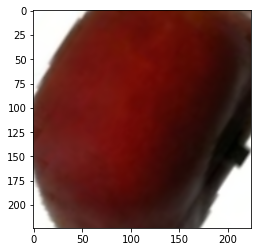

In [15]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [16]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 29.1 ms, sys: 0 ns, total: 29.1 ms
Wall time: 32.1 ms
(32, 224, 224, 3)
(32, 131)


Limes


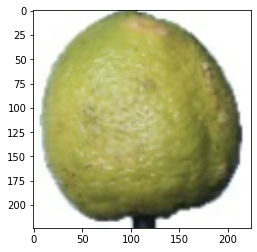

In [17]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [18]:
# Building ResNet50 model
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

94674944/94668760 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               268419    
Total params: 23,833,219
Trainable params: 23,787,779
Non-trainable params: 45,440
_________________________________________________________________


In [19]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [20]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=1,
    #callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

1586/1586 [==============================] - 662s 393ms/step - loss: 0.4502 - accuracy: 0.8726 - precision: 0.9306 - recall: 0.8376 - val_loss: 2.2216 - val_accuracy: 0.6123 - val_precision: 0.6533 - val_recall: 0.5907


In [21]:
#turning off backbone-doing this we are ensuring that the model has lower chances of overfitting
model.layers[0].trainable = False

In [22]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               268419    
Total params: 23,833,219
Trainable params: 268,419
Non-trainable params: 23,564,800
_________________________________________________________________


In [24]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/8
1586/1586 [==============================] - 617s 388ms/step - loss: 0.0892 - accuracy: 0.9728 - precision: 0.9758 - recall: 0.9700 - val_loss: 1.4653 - val_accuracy: 0.6713 - val_precision: 0.7138 - val_recall: 0.6476

Epoch 00001: val_loss improved from inf to 1.46535, saving model to best_weights.h5
Epoch 2/8
1586/1586 [==============================] - 618s 389ms/step - loss: 0.0608 - accuracy: 0.9812 - precision: 0.9828 - recall: 0.9794 - val_loss: 3.6586 - val_accuracy: 0.5288 - val_precision: 0.5592 - val_recall: 0.5144

Epoch 00002: val_loss did not improve from 1.46535
Epoch 3/8
1586/1586 [==============================] - 615s 388ms/step - loss: 0.0452 - accuracy: 0.9858 - precision: 0.9869 - recall: 0.9849 - val_loss: 2.5829 - val_accuracy: 0.6381 - val_precision: 0.6598 - val_recall: 0.6219

Epoch 00003: val_loss did not improve from 1.46535
Epoch 4/8
1586/1586 [==============================] - 612s 386ms/step - loss: 0.0446 - accuracy: 0.9859 - precision: 0.9867